# Tensorflow Implemenation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  True


In [ ]:
from __future__ import absolute_import, division, print_function
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

## Step 1 : Read Data

In [ ]:
data_location = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'

if RUNNING_IN_COLAB:
    data_location = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'

house_prices = pd.read_csv(data_location)
house_prices

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,1,9/16/14,280000,1000102,Multiplex,9/1/14,405100,0.930836,300805.0,2,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.929228,1076162.0,1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.977941,761805.0,1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.961397,442065.0,1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.807904,297065.0,1,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,10/1/12,332400,0.763787,489665.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,False
27059,27060,12/7/12,374000,9895000040,Townhouse,12/1/12,339400,0.779871,479566.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,True
27060,27061,7/9/12,165000,9899200010,Single Family,7/1/12,325300,0.747472,220744.0,1,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27061,27062,5/26/06,315000,9900000355,Single Family,5/1/06,400600,0.920496,342207.0,1,...,2.00,3,7,1939,0,0,103000,212000,98166,False


## Step 2 : Cleanup Data

In [ ]:
print("original row count : ", house_prices.shape)
house_prices = house_prices.dropna()
print ("cleaned up row count : ", house_prices.shape)

original row count :  (27063, 23)
cleaned up row count :  (27063, 23)


## Step 3 : Exploratory Data Analysis (EDA)
EDA will give us a sense of data. 

In [ ]:
##get a summary of data
pd.options.display.float_format = '{:,.2f}'.format

##'describe()' function to get summary info
house_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
DocumentID,"27,063.00","13,532.00","7,812.56",1.00,"6,766.50","13,532.00","20,297.50","27,063.00"
SalePrice,"27,063.00","511,626.20","342,821.17","3,000.00","329,000.00","425,000.00","590,000.00","11,000,000.00"
PropertyID,"27,063.00","4,680,324,882.08","2,896,350,979.15","1,000,102.00","2,213,000,057.50","3,972,900,140.00","7,504,001,385.00","9,906,000,035.00"
zhvi_px,"27,063.00","390,750.58","37,024.46","311,600.00","357,100.00","400,600.00","421,200.00","435,200.00"
zhvi_idx,"27,063.00",0.90,0.09,0.72,0.82,0.92,0.97,1.00
AdjSalePrice,"27,063.00","570,918.76","380,236.63","3,368.00","366,918.50","475,664.00","655,061.00","11,644,855.00"
NbrLivingUnits,"27,063.00",1.02,0.15,1.00,1.00,1.00,1.00,5.00
SqFtLot,"27,063.00","10,997.68","28,110.66",494.00,"4,257.50","6,636.00","9,450.00","1,024,068.00"
SqFtTotLiving,"27,063.00","2,122.96",939.84,370.00,"1,440.00","1,940.00","2,610.00","10,740.00"
SqFtFinBasement,"27,063.00",275.30,428.71,0.00,0.00,0.00,510.00,"3,500.00"


## Step 4 : Choose important attributes
Choosing attributes which could be important in deciding SalePrice.

In [ ]:
input_columns = ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot', 'LandVal', 'ImpsVal']
label_column = 'SalePrice'

## Step 5: Remove Outliers
As we can see we have a few outliers.  
Let's remove them by considering only houses with less than 5 BR

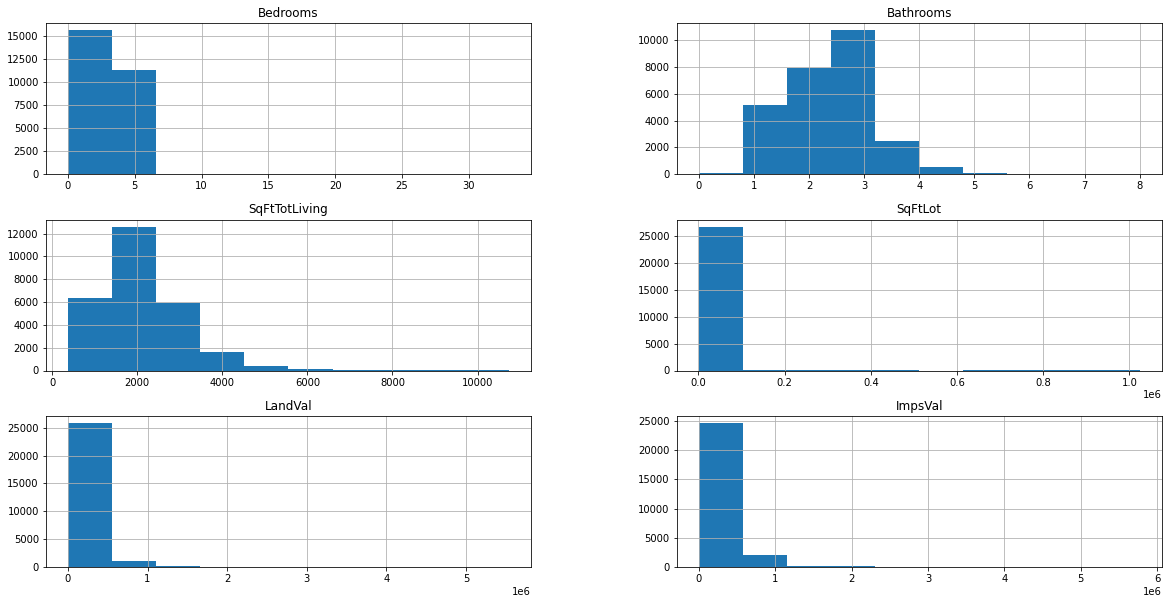

In [ ]:
house_prices[input_columns].hist(figsize=(20,10));

In [ ]:
#considering only houses with less than 5 BR
house_prices = house_prices[house_prices['Bedrooms'] <= 5]
house_prices

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.93,"1,076,162.00",1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.98,"761,805.00",1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.96,"442,065.00",1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.81,"297,065.00",1,...,1.75,4,7,1948,0,0,104000,205000,98168,False
5,6,3/30/09,349900,3600090,Townhouse,3/1/09,369800,0.85,"411,781.00",1,...,1.50,2,8,2008,0,0,170000,207000,98144,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,10/1/12,332400,0.76,"489,665.00",1,...,1.75,2,9,2011,0,0,147000,269000,-1,False
27059,27060,12/7/12,374000,9895000040,Townhouse,12/1/12,339400,0.78,"479,566.00",1,...,1.75,2,9,2011,0,0,147000,269000,-1,True
27060,27061,7/9/12,165000,9899200010,Single Family,7/1/12,325300,0.75,"220,744.00",1,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27061,27062,5/26/06,315000,9900000355,Single Family,5/1/06,400600,0.92,"342,207.00",1,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [ ]:
## Shaping data 
x = house_prices [input_columns]
y = house_prices[[label_column]]

print(x.head())
print ('--------')
print (y.head())

   Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot  LandVal  ImpsVal
1         4       3.75           3764    20156   203000   590000
2         4       1.75           2060    26036   183000   275000
3         5       3.75           3200     8618   104000   229000
4         4       1.75           1720     8620   104000   205000
5         2       1.50            930     1012   170000   207000
--------
   SalePrice
1    1000000
2     745000
3     425000
4     240000
5     349900


## Step 6 :  Split data into train /test

In [ ]:
from sklearn.model_selection import train_test_split
## test_size=0.2  (representing 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_orig = x_train
x_test_orig = x_test
print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (21381, 6)
y_train.shape :  (21381, 1)
x_test.shape :  (5346, 6)
y_test.shape :  (5346, 1)


## Step 7 : Scale Data

In [ ]:
## this is min/max scaler
def my_scaler(df):
    return (df-df.min())/(df.max()-df.min())  
    return (df - df.mean()) / df.std()

print ("x_train: before and after")
print(x_train_orig.head())
x_train = my_scaler(x_train_orig)
print(x_train.head())

print ('-----')
print ('x_test: before / after')
print (x_test_orig.head())
x_test = my_scaler (x_test_orig)
print (x_test.head())

x_train: before and after
       Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot  LandVal  ImpsVal
23386         4       2.50           2710     5239   226000   418000
14567         3       1.00            930     5160    96000   191000
33            3       2.50           2660     9021   269000   394000
12564         3       1.75           1500    10454    65000   131000
22470         2       1.50           1010     7198    78000   116000
       Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot  LandVal  ImpsVal
23386      0.80       0.37           0.30     0.00     0.04     0.10
14567      0.60       0.15           0.07     0.00     0.02     0.05
33         0.60       0.37           0.29     0.01     0.05     0.09
12564      0.60       0.26           0.14     0.01     0.01     0.03
22470      0.40       0.22           0.08     0.01     0.01     0.03
-----
x_test: before / after
       Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot  LandVal  ImpsVal
10280         5       2.75           2450    108

## Step 8:  Building a Model

Building a 3 layer network
- input (64 neurons)
- hidden (64 neurons)
- output (1 neuron)

input_dim :  6
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                448       
                                                                 
 hidden_2 (Dense)            (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
None


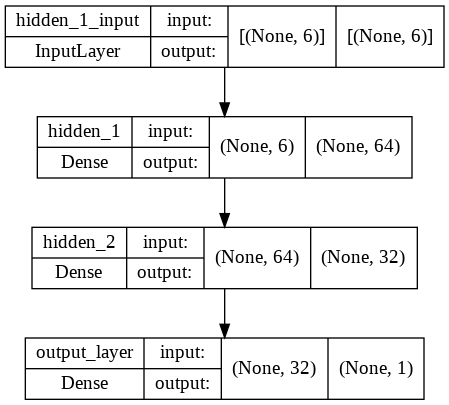

In [ ]:
input_dim = len(x_train.keys())
print ("input_dim : ", input_dim)

##defining a model
##adding 64 neurons (units=64) for 'input_layer'  and 'hidden_1' layer
##final outupt layer has ONE neuron  (units=1)
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_shape=[input_dim], name="hidden_1"),
            tf.keras.layers.Dense(units=32, activation=tf.nn.relu, name="hidden_2"),
            tf.keras.layers.Dense(units=1, name="output_layer")
        ])

## We are taking optimizer as RMSProp
optimizer = tf.keras.optimizers.RMSprop(0.01)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

print (model.summary())

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 9:  Train

In [ ]:
%%time
epochs = 100
print ("training starting ...")
history = model.fit(x_train, y_train, epochs=epochs)
print ("training done.")


training starting ...
Epoch 1/100
669/669 [==============================] - 5s 3ms/step - loss: 272585113600.0000 - mean_absolute_error: 407083.9062 - mean_squared_error: 272585113600.0000
Epoch 2/100
669/669 [==============================] - 2s 3ms/step - loss: 72357969920.0000 - mean_absolute_error: 163161.3281 - mean_squared_error: 72357969920.0000
Epoch 3/100
669/669 [==============================] - 2s 3ms/step - loss: 61714116608.0000 - mean_absolute_error: 151785.9688 - mean_squared_error: 61714116608.0000
Epoch 4/100
669/669 [==============================] - 2s 3ms/step - loss: 51141447680.0000 - mean_absolute_error: 137071.4062 - mean_squared_error: 51141447680.0000
Epoch 5/100
669/669 [==============================] - 2s 3ms/step - loss: 41692659712.0000 - mean_absolute_error: 122996.3828 - mean_squared_error: 41692659712.0000
Epoch 6/100
669/669 [==============================] - 2s 3ms/step - loss: 34978705408.0000 - mean_absolute_error: 113544.0156 - mean_squared_erro

## Step 10: History

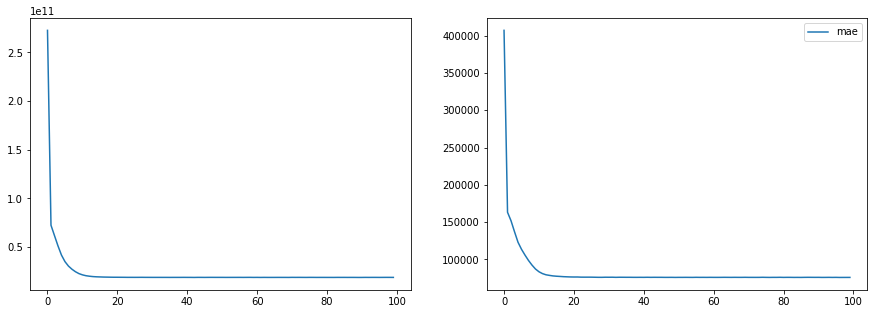

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['mean_squared_error'], label='mse')
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='mae')
plt.legend()
plt.show()

## Step 11 : Evaluate Model

In [ ]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)
metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'mean_absolute_error', 'mean_squared_error']
Metric : loss = 128,359,989,248.00
Metric : mean_absolute_error = 265,471.94
Metric : mean_squared_error = 128,359,989,248.00


## Step 12: Predict

In [ ]:
y_pred = model.predict(x_test)
print (x_test)
print(y_pred)

       Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot  LandVal  ImpsVal
10280      1.00       0.46           0.23     0.01     0.15     0.10
3126       0.40       0.17           0.04     0.00     0.09     0.02
18632      0.80       0.54           0.45     0.01     0.14     0.27
7407       0.60       0.25           0.13     0.01     0.07     0.06
25629      0.80       0.42           0.30     0.01     0.13     0.15
...         ...        ...            ...      ...      ...      ...
21976      0.60       0.25           0.08     0.01     0.04     0.03
15436      0.80       0.50           0.27     0.01     0.04     0.10
23437      0.60       0.33           0.20     0.01     0.04     0.05
22467      0.60       0.17           0.06     0.01     0.03     0.03
3577       0.80       0.46           0.17     0.01     0.03     0.05

[5346 rows x 6 columns]
[[1075434.5 ]
 [ 536563.56]
 [1606752.1 ]
 ...
 [ 436185.75]
 [ 297872.3 ]
 [ 373604.3 ]]


## Step 13: Evalute prediction output
Let's do a pd dataframe and do some plots

In [ ]:
predictions_df = pd.DataFrame(x_test_orig)  # use the original one, not scaled
predictions_df['actual_price'] = y_test
predictions_df['predicted_price'] = y_pred
predictions_df['error'] = predictions_df['actual_price'] - predictions_df['predicted_price'] 
pd.options.display.float_format = '{:,.2f}'.format
predictions_df.sample(frac=0.1)

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,LandVal,ImpsVal,actual_price,predicted_price,error
20223,3,2.00,1640,4400,366000,198000,515000,"966,191.44","-451,191.44"
19786,2,1.00,990,12399,81000,111000,340000,"318,263.47","21,736.53"
6185,3,2.50,1760,8584,91000,214000,150000,"444,760.59","-294,760.59"
17077,4,2.75,2480,5000,222000,254000,455000,"747,023.62","-292,023.62"
25196,4,3.25,3690,12950,1018000,756000,1548000,"2,860,606.00","-1,312,606.00"
...,...,...,...,...,...,...,...,...,...
18994,2,1.00,960,5650,82000,142000,340000,"338,426.09","1,573.91"
15580,3,2.00,1250,16188,98000,132000,333000,"374,078.69","-41,078.69"
17995,4,3.75,4070,8275,244000,705000,1050000,"1,253,299.25","-203,299.25"
7409,3,1.00,1080,7615,120000,131000,270000,"395,160.47","-125,160.47"


In [ ]:
## which house we got really wrong?
print ("biggest error : ")
predictions_df.loc[predictions_df['error'].abs().idxmax()]


biggest error : 


Bedrooms                   4.00
Bathrooms                  4.00
SqFtTotLiving          5,990.00
SqFtLot               13,300.00
LandVal              757,000.00
ImpsVal            2,324,000.00
actual_price         657,500.00
predicted_price    3,721,622.50
error             -3,064,122.50
Name: 3969, dtype: float64

In [ ]:
## which house we are spot on?
print ("lowest error")
predictions_df.loc[predictions_df['error'].abs().idxmin()]

lowest error


Bedrooms                2.00
Bathrooms               1.00
SqFtTotLiving       1,220.00
SqFtLot             6,784.00
LandVal            77,000.00
ImpsVal           147,000.00
actual_price      343,000.00
predicted_price   343,067.75
error                 -67.75
Name: 22768, dtype: float64

### How many house sales, we predicted within 5% ?
Let's use 5% margin of error as our benchmark

In [ ]:
predictions_df['error_percentage'] = predictions_df['error'].abs() * 100 / predictions_df['actual_price']
predictions_df

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,LandVal,ImpsVal,actual_price,predicted_price,error,error_percentage
10280,5,2.75,2450,10890,369000,313000,425000,"1,075,434.50","-650,434.50",153.04
3126,2,1.00,750,4500,223000,75000,295000,"536,563.56","-241,563.56",81.89
18632,4,3.25,4370,6000,341000,885000,629000,"1,606,752.12","-977,752.12",155.45
7407,3,1.50,1540,8253,180000,182000,395000,"564,582.12","-169,582.12",42.93
25629,4,2.50,3090,6200,332000,488000,829650,"1,191,288.12","-361,638.12",43.59
...,...,...,...,...,...,...,...,...,...,...
21976,3,1.50,1070,7500,105000,115000,270000,"360,707.25","-90,707.25",33.60
15436,4,3.00,2800,7845,108000,322000,390000,"594,114.06","-204,114.06",52.34
23437,3,2.00,2180,7320,97000,172000,400500,"436,185.75","-35,685.75",8.91
22467,3,1.00,910,9180,80000,96000,244000,"297,872.31","-53,872.31",22.08


In [ ]:

benchmark = 5  # 5%

good_predictions = predictions_df[predictions_df['error_percentage'] <= benchmark]

good_predictions

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,LandVal,ImpsVal,actual_price,predicted_price,error,error_percentage
6135,3,1.50,1060,9711,75000,136000,315000,"324,755.34","-9,755.34",3.10
15868,3,1.00,1450,3350,196000,236000,600000,"625,549.25","-25,549.25",4.26
16610,4,3.50,4010,15365,331000,816000,1515000,"1,518,001.00","-3,001.00",0.20
8776,3,2.50,1740,1251,122000,403000,625000,"641,065.75","-16,065.75",2.57
23995,3,2.50,2690,8881,257000,554000,1149542,"1,092,506.75","57,035.25",4.96
...,...,...,...,...,...,...,...,...,...,...
22325,4,2.00,2710,8960,73000,163000,385000,"398,624.19","-13,624.19",3.54
1918,3,1.75,1520,10500,78000,116000,331000,"333,780.78","-2,780.78",0.84
24282,5,3.25,2970,6000,405000,653000,1400000,"1,456,074.25","-56,074.25",4.01
7364,4,2.50,2720,43560,136000,484000,745000,"778,705.12","-33,705.12",4.52


In [ ]:
meeting_benchmark = good_predictions.shape[0] *100 / predictions_df.shape[0]

print ("number of predictions within benchmark error ({}%) are  =  {:,}  ({:.1f}% of total)".
       format (benchmark, good_predictions.shape[0], meeting_benchmark))


number of predictions within benchmark error (5%) are  =  99  (1.9% of total)
